![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology with Simulations and Measurements Lab
# Computer Lab: Longitudinal Motion
##### Author: E. Harms, N. Neveu

This worksheet demonstrates phase space motion in the longitudinal degree of freedom.   
Questions to be answered and turned in for grade are typeset in **Bold** Type.

### Python Notes: 
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
- '2**2' represents two squared, i.e. 2^2
- A colon (:) means all values in that dimension. i.e. array[:,2] = all rows, second column
----------

## 1. Longitudinal Phase Space Motion

The difference equations for longitudinal motion of a charged particle in a linac or synchrotron can be written as:

$\Delta E_{n+1} = \Delta E_n + eV (sin \phi_n - sin \phi_s)$

$\phi_{n+1} = \phi_n + \frac{2 \pi h \eta}{E} \Delta E_{n+1}$

The following cells allow the user to enter various initial conditions (i.e. various $\phi_0$, $\Delta E_0$) of particles and “track” their motion for a specified number of iterations.

In order to do the calculations in Mathcad, the equations had to be written such that the indices of order n appear on the right-hand side, and indices of order n+1 appear on the left. You should verify that the difference equations here are equivalent to the ones derived in class.

In the worksheet program, the user can vary the parameters of the basic equations of motion to produce phase space plots in $\Delta E_0 -\phi$ coordinates.  
The default parameters are typical of Fermilab Main Injector operation at its injection energy.  
By inputting various initial conditions one can explore the phase space region under various parameter regimes.  
For example: The synchronous phase is initialized to 0. For this value locate the separatrix.



In [ ]:
#Importing the libraries we need
import numpy as np

#Defining some variables
#These will be used later
h      = 588 #
eV     = 1.28*10**-13  #joule
GeV    = 1.6*10**-10   #10**9*eV
E_s    = 8*GeV         # Energy
phi_s  = np.deg2rad(0) #Synchronous phase
g_t    = 21.8          # gamma_t 
eta    = 1/g_t**2 - (0.938*GeV)**2 / E_s**2
beta_s = np.sqrt(1 - ( (0.938*GeV) / E_s )**2 ) # Relativistic beta
k      = (2*np.pi*h*eta)/(beta_s**2 * E_s)      # coefficent (2pi h eta)/ E

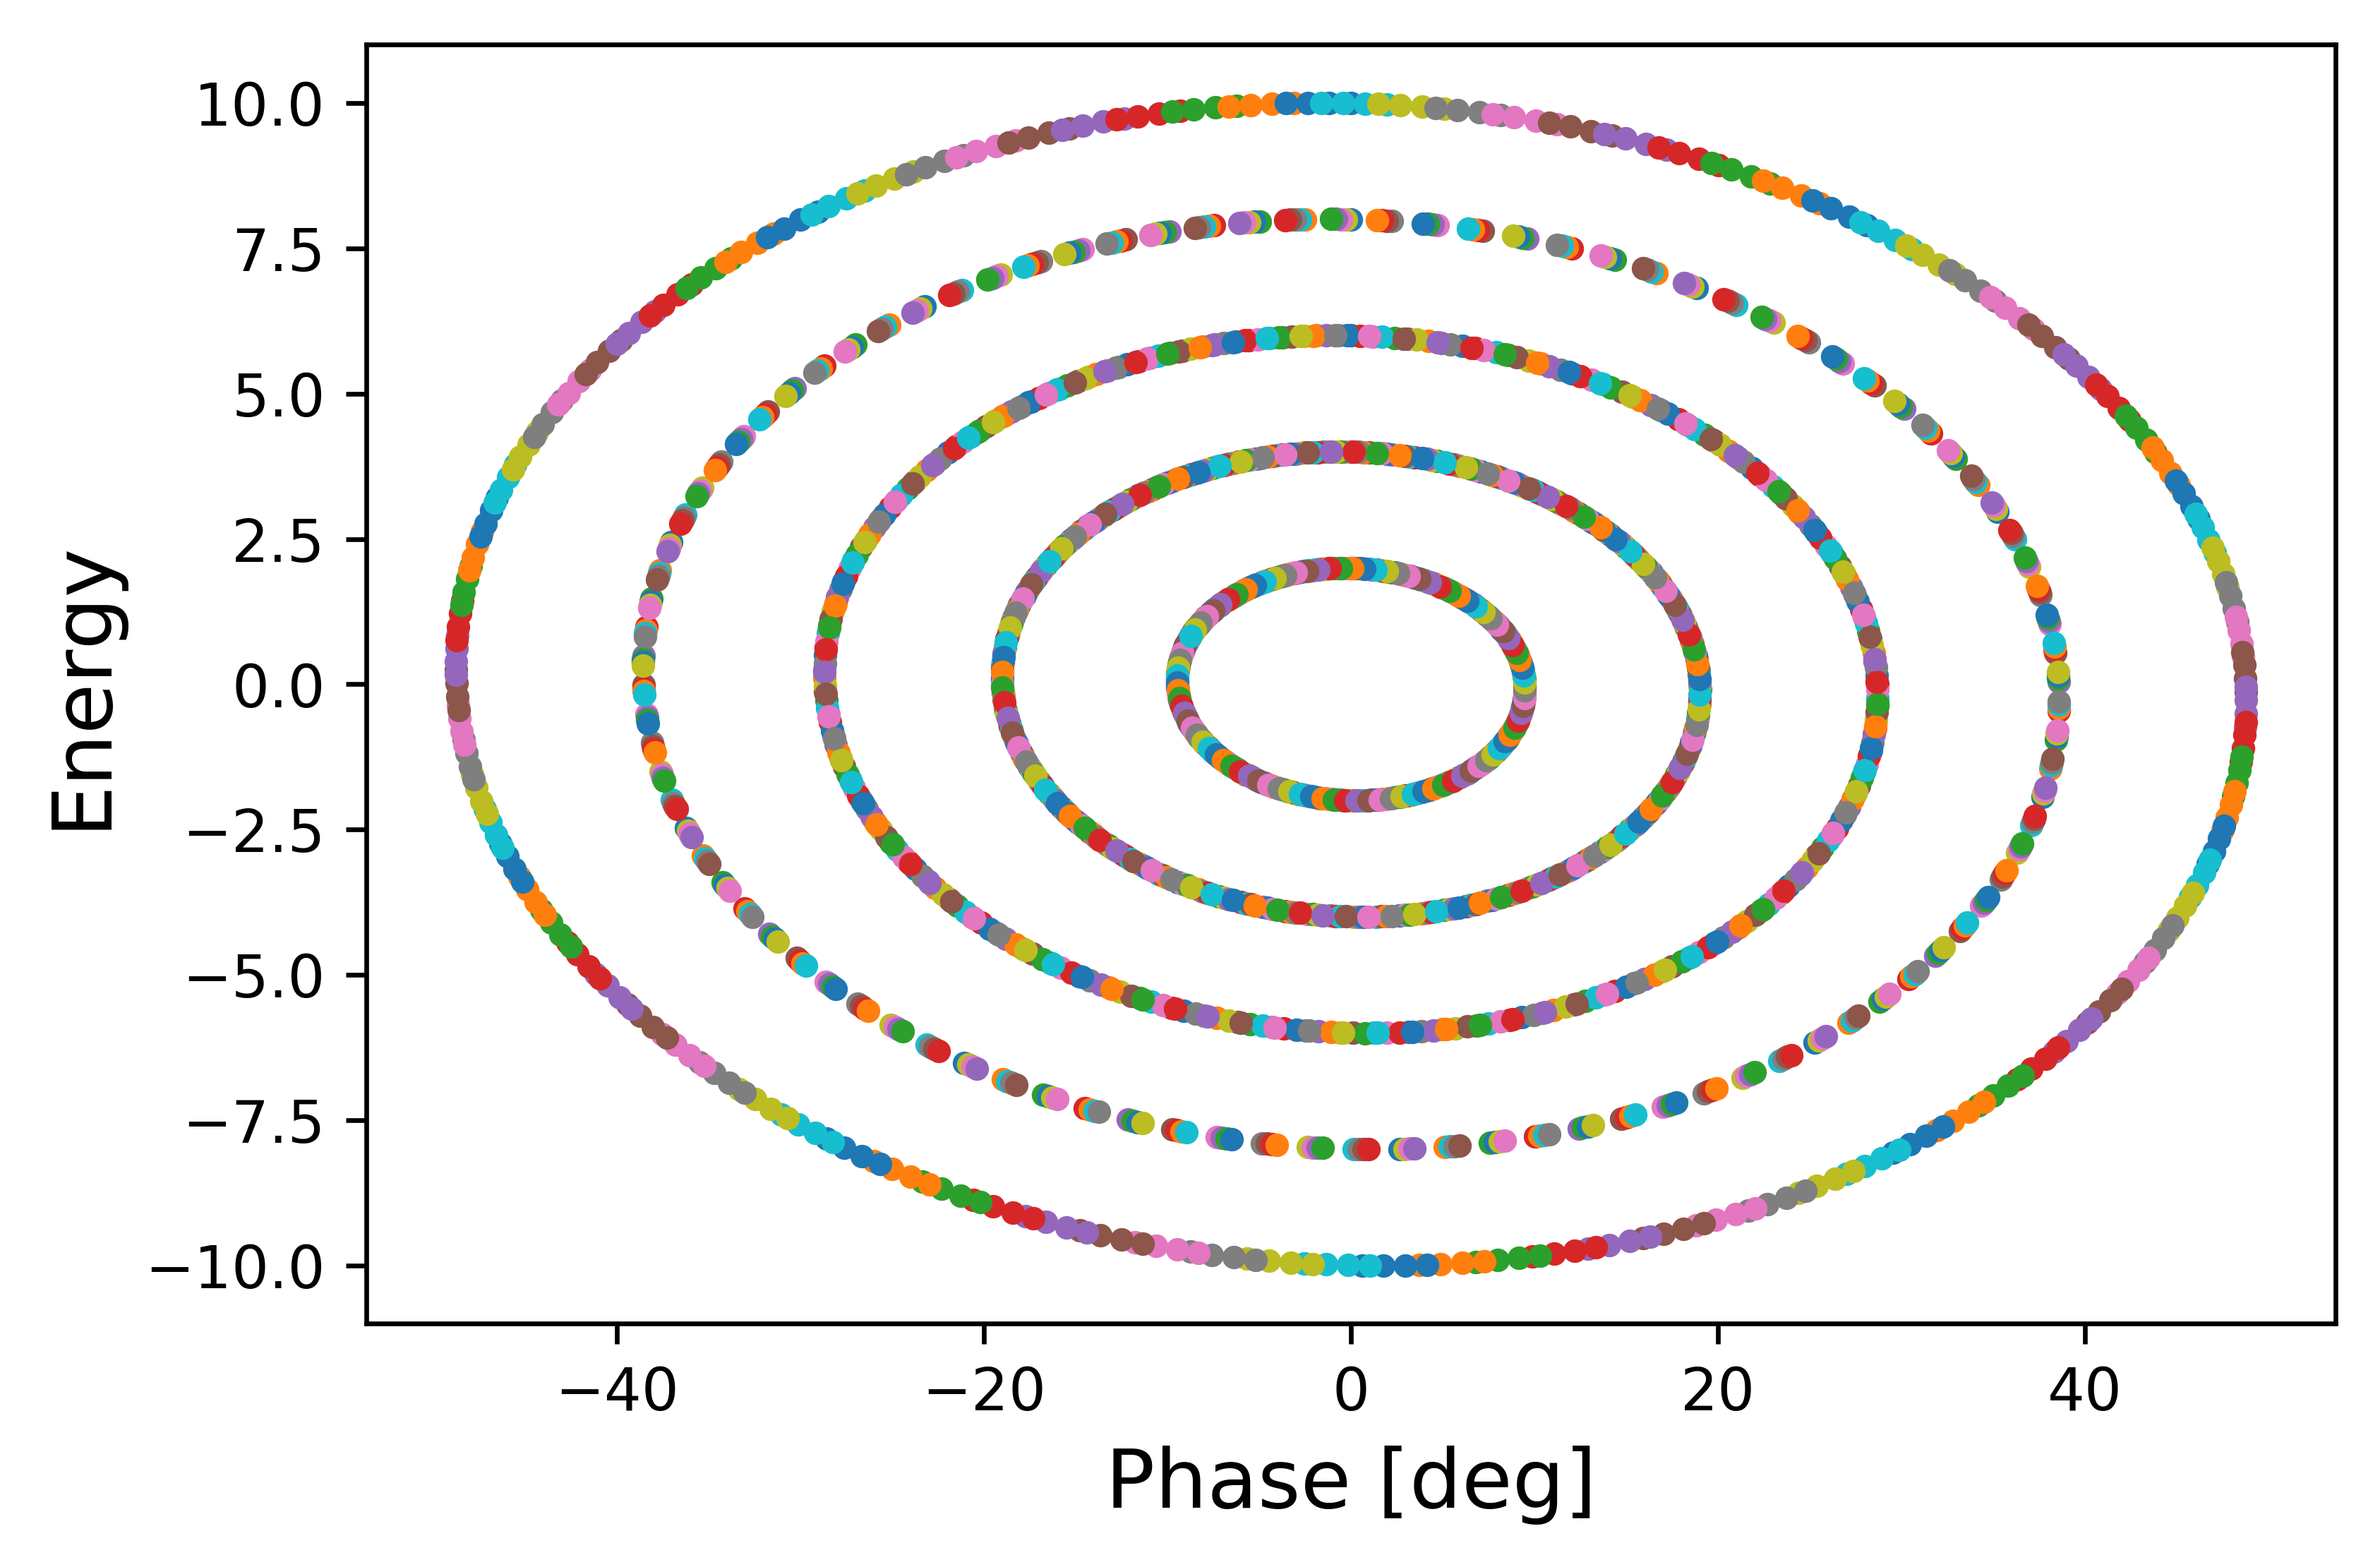

In [76]:
#Tracking N Particles
#Change phi_0 and dE_0 below to change the plot.
n      = 5      #number of particles
nturns = 400    #number of turns to track
phi_0  = np.deg2rad([0,0,0,0,0])           # Intial Phase of particles
dE_0   = np.array([2,4,6,8,10])*GeV*10**-3 # Initial Energy of particles in MeV 

# Creating some arrays to hold the data
dE_vals = np.zeros((n,nturns)) #create array to hold data
phi_vals = np.zeros((n,nturns))

#Setting initial conditions:
dE_vals[:,0]  = dE_0
phi_vals[:,0] = phi_0

#Calculating dE and phase for each particle for nturns.
for i in range(0,nturns-1):
    #Converting 
    radians = phi_vals[:,i]
    
    #dE_n+1 = dE_n + eV* ( sin(phi_n) - sin(phi_s) )
    dE_vals[:,i+1]  = dE_vals[:,i] + eV*( np.sin(radians) - np.sin(phi_s) )
    
    #phi_n+1 = phi + k * dE_n + eV ( sin(phi_n) - sin(phi_s) )
    phi_vals[:,i+1] = radians + k* ( dE_vals[:,i] + eV* ( np.sin(radians) - np.sin(phi_s)) ) 
    
# Importing plotting library
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.dpi'] = 600
# Making things nicer to plot
scale_plot = GeV*10**-3  #MeV
degrees    = np.rad2deg(phi_vals) #Deg

# Plotting the data
plt.plot(degrees,dE_vals/scale_plot, '.')
plt.xlabel('Phase [deg]', size=14)
plt.ylabel('Energy', size=14)
plt.show()

**Q1) What value (approximately of $\Delta E$ will the Radiofrequency system support under these conditions?**


**Q2) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?  
Hint: Look at the motion of a particle that is very near the separatrix.**


**Q3) How does the motion behave near the “unstable fixed points”?**
- Change the synchronous phase, $\phi_s$, to 30$^\circ$ (what happens in a synchrotron when this phase change occurs?). Under these conditions...


**Q4) What value (approximately) of $\Delta E$ will the Radiofrequency system support now?**


**Q5) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?**


**Q6) How does the motion behave near the “unstable fixed points”?**


Next, leaving the other parameters as they are, change the energy of the particle, $E_s$,  
from 8 GeV to 150 GeV. Where is the stable phase space region located now?  
(note: the transition energy of the Main Injector is about 22; what happens at transition?).



**Q7) What maximum $\Delta E$ will the RF system support now?**

The user should feel free to play with the parameters of the program.  
Put in the parameters of you “favorite” accelerator and explore phase space.  
Be sure to play with changing the scales of the plot axes in order to see the results.

#### Optional: 
Since the difference equations are of a non-linear system, one can push the parameters until resonance islands, chaos, and other non-linear effects are found.  
Go back to the “stationary bucket” case ($\phi_s$ = 0): 
- Increase the voltage by a factor of 10 and look at the phase space; 
- another factor of 10; another; and so on. 
- Can you find other regions of stability in the phase space? 
- Is there a value of the voltage for which the entire phase space becomes unstable?

----

## 2. Synchrotron Tune vs. Oscillation Amplitude

In \#1, it should have been noticed that the motion i.e. the frequency at which particles circulate in phase space, slows down when the particle is near the separatrix, especially near the “unstable fixed points”. The Python library Numpy has a Fast Fourier Transform (FFT) function that allows one to analyze data for frequency content. 
The following cells are similar to the previous one, but tracks a single particle. The motion of that particle is then analyzed using the FFT function, and the frequency (or, in this case, the synchrotron “tune”) of the particle’s motion is estimated by looking at what tune value corresponds to the peak of the FFT coefficients.
The synchrotron tune for particles with small oscillation amplitude is:

$\nu$

This expression is reproduced in Python so that the result of the FFT can be directly compared with the analytical result obtained by solving the equations of motion of a particle’s longitudinal motion.

- Track a particle for 254 turns (note: an FFT calculation requires that one track for 2n-2 turns, where n is an integer) 
- Use the initial conditions $\phi_0 = 0$ and $\Delta E_0 = 1$ MeV. 
- These should be the default values when the worksheet is loaded.

**Q8) What synchrotron tune does the FFT of the tracking data show? How does this compare with the analytically predicted value?**
- Try varying the number of turns tracked, such as 126, 510, 2046, etc.

**Q9) For what number of turns is the FFT result within 5% of the predicted result?**
- Next, tracking over 1022 turns, slowly raise the initial $\Delta E$ from 1 MeV (steps of 1- 2 MeV are good) and keep track of the synchrotron tune. 
- **How does the tune behave?** 

**Q10) Make a plot of $\nu_{FFT}$ vs. $\Delta E_0$ for $\Delta E$ from 1 MeV to 30 MeV.**
- Note the value of $\Delta E$ at the separatrix.
- Study the synchronous tune vs. amplitude for other synchronous phases, $\phi_s$.

----

## 3. Injection to Acceleration

The section demonstrates the effects of non-adiabatic variation of system parameters. This program, tracks a single particle in longitudinal phase space, and varies the RF synchronous phase linearly from $\phi_s=0$ (injection value) to a final value $\phi_{sf}$ (equal to 30 ̊ in the worksheet) used for acceleration.

The “injection porch” length – the time particles spend at the injection energy – is input with the parameter Nporch. The time it takes to reach the final acceleration rate is Nparab. The program plots $\phi_s$ versus turn number. The phase space plot begins by plotting only the first 900 turns (controlled by Nf).

In [ ]:
#Defining variables

Nporch = 0 #injection porch length
Nparab = 0 #time to reach final acceleration rate
Nf     = 900 #Number of turns 

**Q11) What is the synchrotron period in this example?**

- Vary Nf from 900 to the final value of 3000 in steps of 300. 
- Note how the particle’s phase space trajectory follows the synchronous phase as it moves from 0 to 30 degrees. 
- Note also how the size of the particle’s phase space ellipse remains essentially constant along the way. Thus, its “longitudinal emittance” is preserved in the process. The phase changes slowly enough that the motion is said to remain adiabatic.
- Next, change the “ramp parabola” i.e. decrease the number of turns it takes to make the RF synchronous phase reach 30 ̊. 
- Notice how the final particle emittance increases as the rate of phase change increases. 
- The process becomes non-adiabatic and the emittance is not preserved. 
- In general, if the motion is to be adiabatic, then the system parameters must change much more slowly than the period of the motion.

**Q12) What is the approximate fewest number of turns one can make the phase change in and still preserve the initial emittance?**